# Python for Scientific Data Analysis


#    Matplotlib

In [234]:
#preamble stuff
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize']=[12,8]

## Section 5: Additional Types of Plots: Box-and-Whisker Plots, Violin Plots, and Heat Maps


Earlier in the SciPy section of the course, we discussed different types of data distributions and statistics associatd with them (e.g. median, interquartile range, etc.).   In a previous Matplotlib section, we encountered plots that visualize different distributions of data -- e.g. histogram plots.  Now, let's discuss plots that combine visulizing data distributions _and_ the statistics associated with them:  box-and-whisker plots and violin plots.

### _Box-and-Whisker plots_

IQR is [ 92.94872325 105.00852473] 74.85902103158341 123.09822694963819
whiskers extend to 80.12431085399108 121.90455625809979
IQR is [ 77.88324924 103.74462281] 39.09118888752787 142.5366831701605
whiskers extend to 47.52208551380386 136.29317133347018
IQR is [76.03060781 82.86044121] 65.78585770762919 93.10519131309297
whiskers extend to 67.64177749936356 91.35346428902199
IQR is [59.4029618  80.27765671] 28.09091942064795 111.58969908919899
whiskers extend to 29.546700355876425 109.48573097256086


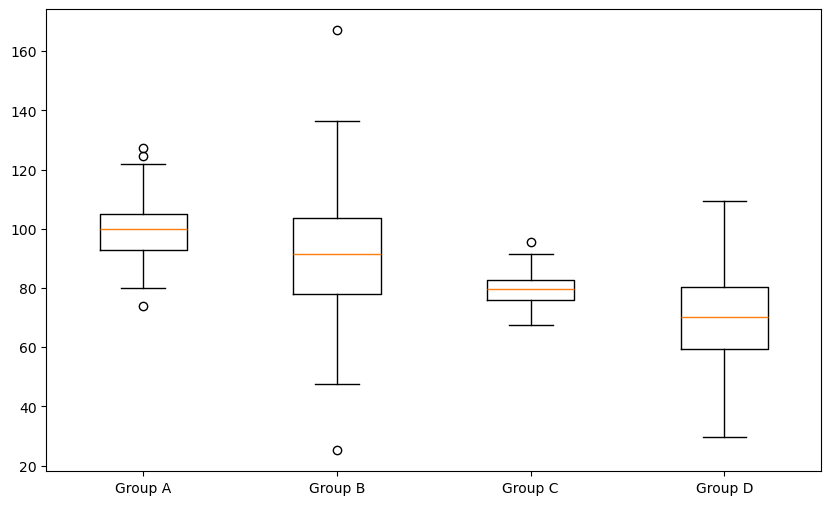

In [235]:
# Generate some sample data
np.random.seed(42)
data1 = np.random.normal(100, 10, 200)
data2 = np.random.normal(90, 20, 200)
data3 = np.random.normal(80, 5, 200)
data4 = np.random.normal(70, 15, 200)

# Create the box plot
fig, ax = plt.subplots(figsize=(10, 6))


labels = ['Group A', 'Group B', 'Group C', 'Group D']
data = [data1, data2, data3, data4]


bp = ax.boxplot(data,labels=labels)

#showing where the whiskers go ...
#bottom and top of the box for data
for i,j in enumerate(data):

    q1,q3 = np.percentile(j, [25,75])
    q3 = np.percentile(j, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

# Points within whisker range 
    within_whiskers = np.where((j >= lower_bound) & (j <= upper_bound))
    whisker_low = np.min(j[within_whiskers])
    whisker_high = np.max(j[within_whiskers])

    print('IQR is {} {} {}'.format(np.percentile(j,[25,75]),np.percentile(j,25)-1.5*iqr,np.percentile(j,75)+1.5*iqr))
    print('whiskers extend to {} {}'.format(whisker_low,whisker_high))

 #   ax.annotate(f'Whisker: {whisker_low:.1f}', 
 #           xy=(i+1, whisker_low), 
 #           xytext=(i+1.1, whisker_low),
 #           fontsize=7)
 #   ax.annotate(f'Whisker: {whisker_high:.1f}', 
 #           xy=(i+1, whisker_high), 
 #           xytext=(i+1.1, whisker_high),
 #           fontsize=7)

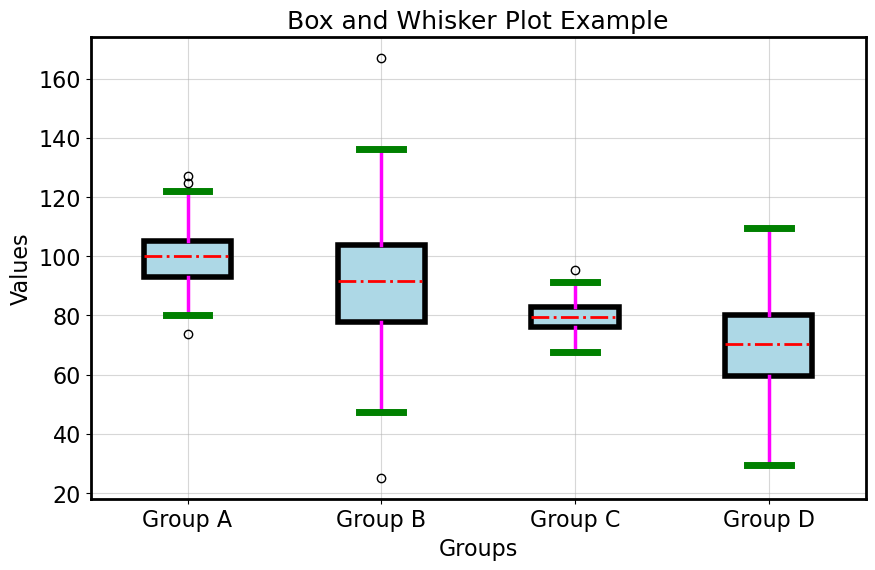

In [236]:
#a more customized version...

# Generate some sample data
np.random.seed(42)
data1 = np.random.normal(100, 10, 200)
data2 = np.random.normal(90, 20, 200)
data3 = np.random.normal(80, 5, 200)
data4 = np.random.normal(70, 15, 200)

# Create the box plot
fig, ax = plt.subplots(figsize=(10, 6))


labels = ['Group A', 'Group B', 'Group C', 'Group D']
data = [data1, data2, data3, data4]

#positions to hard-code the x positions of the center of the box
#the default for i entries in box plot, space by i+1
bp = ax.boxplot(data,labels=labels, patch_artist=True,positions=[1,2,3,4])
#doubles the width
#bp = ax.boxplot(data,labels=labels, patch_artist=True,positions=[2,4,6,8])


# Customize the appearance with `patch_parts
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_edgecolor('black')
    patch.set_linewidth(4)

for whisker in bp['whiskers']:
    whisker.set(color='magenta', linewidth=2.5)

for cap in bp['caps']:
    cap.set(color='green', linewidth=5)

for median in bp['medians']:
    median.set(color='red', linewidth=2,linestyle='-.')

ax.tick_params(axis='both',labelsize=16)
#fontsize=16)
ax.set_ylabel('Values',fontsize=16)
ax.set_xlabel('Groups',fontsize=16)
ax.set_title('Box and Whisker Plot Example',fontsize=18)
ax.grid(True, alpha=0.5)

plt.setp(ax.spines.values(),linewidth=2)
plt.show()

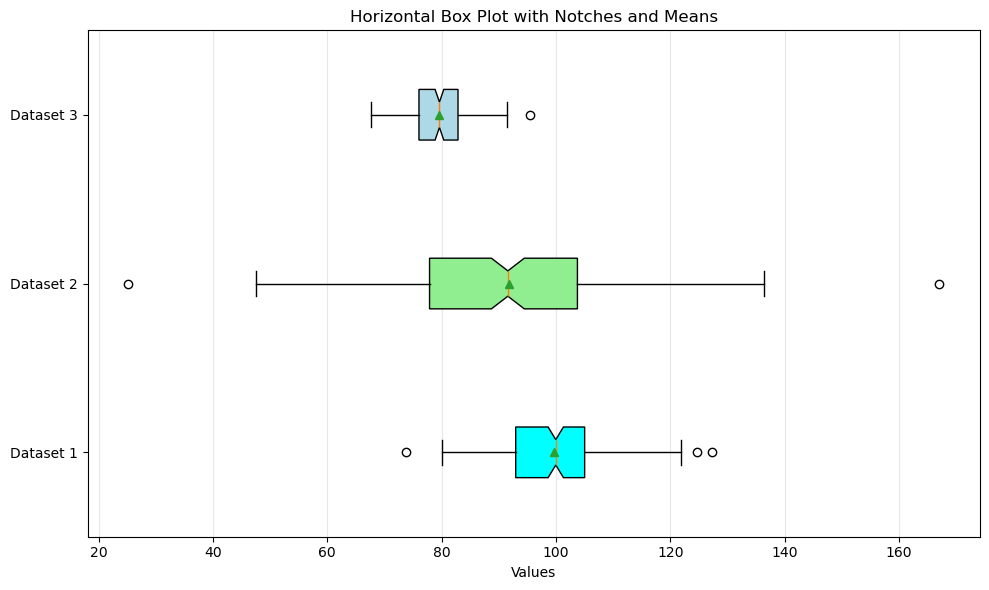

In [237]:

# Generate sample data
np.random.seed(42)
data = [np.random.normal(100, 10, 200),
        np.random.normal(90, 20, 200),
        np.random.normal(80, 5, 200)]

fig, ax = plt.subplots(figsize=(10, 6))

# Horizontal box plot
bp = ax.boxplot(data, vert=False, patch_artist=True,
                labels=['Dataset 1', 'Dataset 2', 'Dataset 3'],
                notch=True,  # Add notches
                showmeans=True)  # Show mean as well as median, shows up as a triangle

# Color the boxes
colors = ['cyan', 'lightgreen', 'lightblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xlabel('Values')
ax.set_title('Horizontal Box Plot with Notches and Means')
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

### Violin plots

The box-and-whisker plot showed the the median (center of box), interquartile range (width of box), and some measure of outliers (i.e. the whiskers).  But it does not actually help you visualize how the data are distributed. 

A _violin_ plot gives you a better sense of the distribution.  

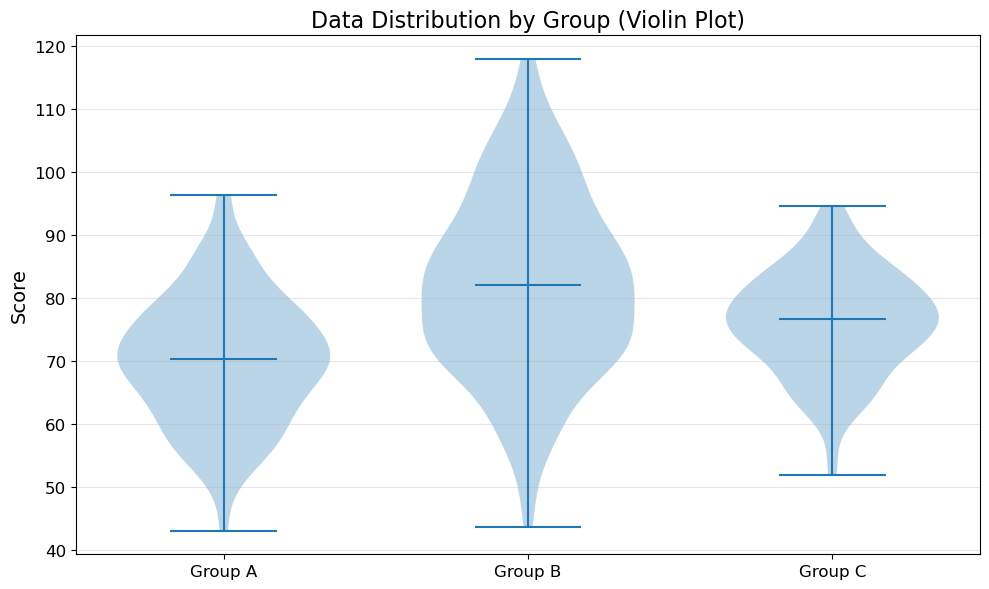

In [238]:
data1 = np.random.normal(70, 10, 200)
data2 = np.random.normal(80, 15, 200)
data3 = np.random.normal(75, 8, 200)

# Create violin plot
fig, ax = plt.subplots(figsize=(10, 6))

parts = ax.violinplot([data1, data2, data3], 
                       positions=[1, 2, 3],
                       showmeans=False,
                       showmedians=True,
                       widths=0.7)

# Customize colors
#colors = ['lightblue', 'lightcoral', 'lightgreen']
#for i, pc in enumerate(parts['bodies']):
#    pc.set_facecolor(colors[i])
#    pc.set_alpha(0.7)

# Labels and formatting
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Group A', 'Group B', 'Group C'])
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Data Distribution by Group (Violin Plot)', fontsize=16)
ax.tick_params(labelsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

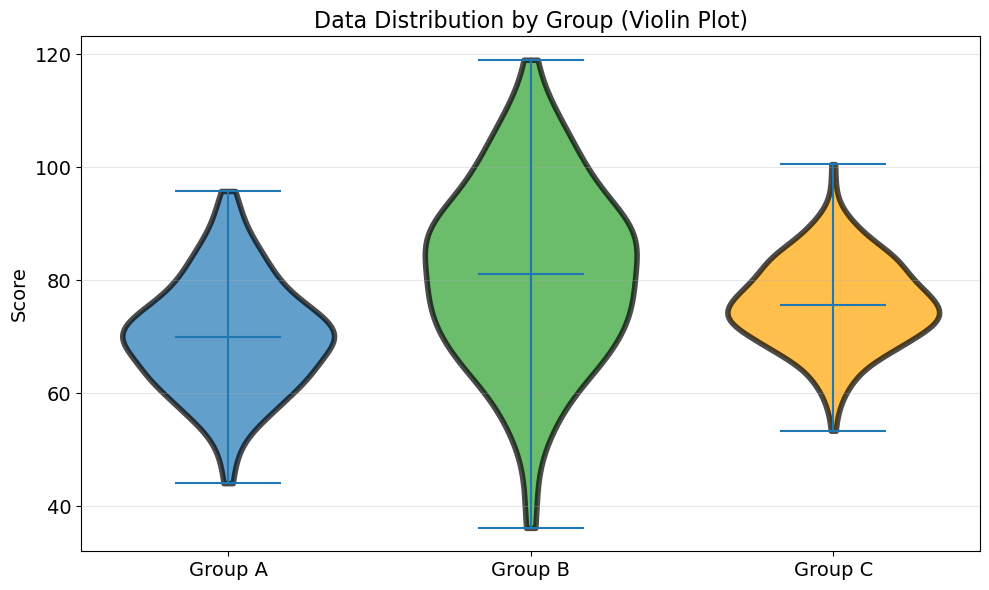

In [239]:
#and with a bit of customization ...

data1 = np.random.normal(70, 10, 200)
data2 = np.random.normal(80, 15, 200)
data3 = np.random.normal(75, 8, 200)

# Create violin plot
fig, ax = plt.subplots(figsize=(10, 6))

parts = ax.violinplot([data1, data2, data3], 
                       positions=[1, 2, 3],
                       showmeans=False,
                       showmedians=True,
                       widths=0.7)

 #Customize colors
colors = ['tab:blue', 'tab:green', 'orange']
edge_colors=['black']*len(parts['bodies'])
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolors(edge_colors[i])
    pc.set_alpha(0.7)
    pc.set_linewidth(4)

# Labels and formatting
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Group A', 'Group B', 'Group C'])
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Data Distribution by Group (Violin Plot)', fontsize=16)
ax.tick_params(labelsize=14)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### _Box-and-whisker plots vs Violin Plots_ 

By default, a box-and-whisker plot shows points outside 1.5*IQR away from the interquartile range as individual points, while a violin plot shows all of the data within its symbol.

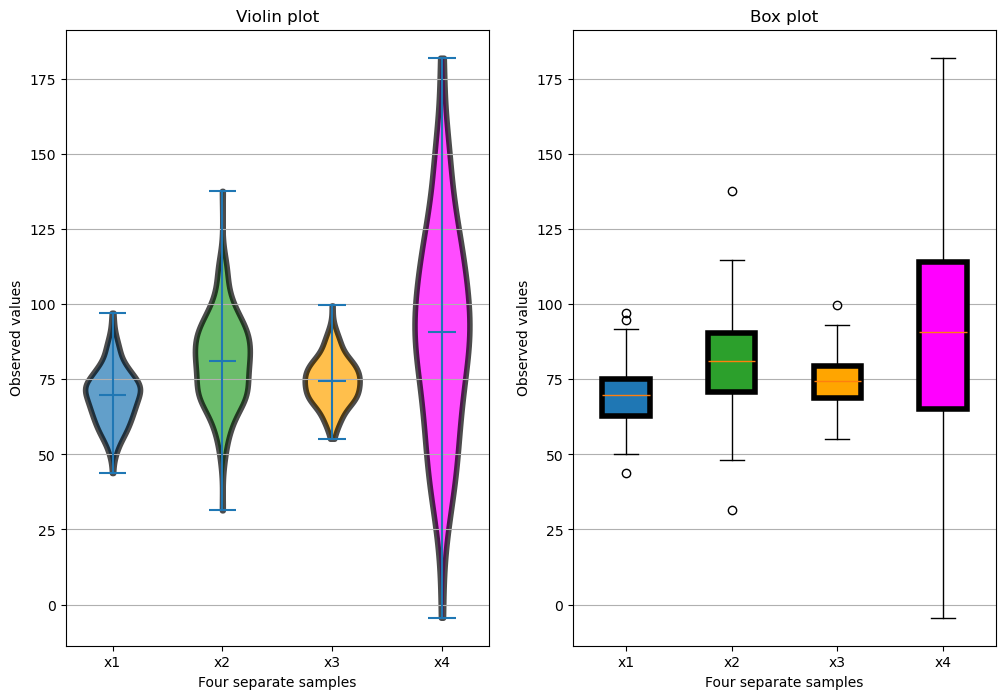

In [240]:
# Fixing random state for reproducibility
np.random.seed(42)

data1 = np.random.normal(70, 10, 200)
data2 = np.random.normal(80, 15, 200)
data3 = np.random.normal(75, 8, 200)

data4 = np.random.normal(90, 35, 200)

data=[data1,data2,data3,data4]

fig,axs=plt.subplots(1,2,figsize=(12,8))

# plot violin plot
vplot=axs[0].violinplot(data,
                  showmeans=False,
                  showmedians=True)

colors = ['tab:blue', 'tab:green', 'orange','magenta']
edge_colors=['black']*len(vplot['bodies'])
for i, pc in enumerate(vplot['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolors(edge_colors[i])
    pc.set_alpha(0.7)
    pc.set_linewidth(4)

axs[0].set_title('Violin plot')

# plot box plot
bplot=axs[1].boxplot(data,patch_artist=True)

for i,patch in enumerate(bplot['boxes']):
    patch.set_facecolor(colors[i])
    patch.set_edgecolor('black')
    patch.set_linewidth(4)
    #print(patch.get_facecolor())
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(data))],
                  labels=['x1', 'x2', 'x3', 'x4'])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

plt.show()

### Heat Maps

Also earlier in the NumPy notes on Principal Component Analysis, we presented a "confusion matrix" that compared the predict digit vs true digit for a set of noisy digits after we applied a Support Vector Classifier on a training set.  Correct classifications showed up along the diagonal: the number of correct classifications were depicted using different colors (light color = 'many correct', dark color = 'fewer correct').   We could also spot patterns of misclassification with our SVC.

The confusion matrix is but one example of a _heat map_ that visualize any matrix of values using color intensity to represent numerical values across a grid and identify patterns.  You can imagine other more complex classifications.  E.g. in bioinformatics, you have 1...N samples and 1...M genes and you want to depect the level of gene expression of each gene in each sample.   Or if you have two different types of traits (e.g. an 'x' trait of hair color and a 'y' trait of eye color and you are looking to see how strong a particular measurent is in the sample). 


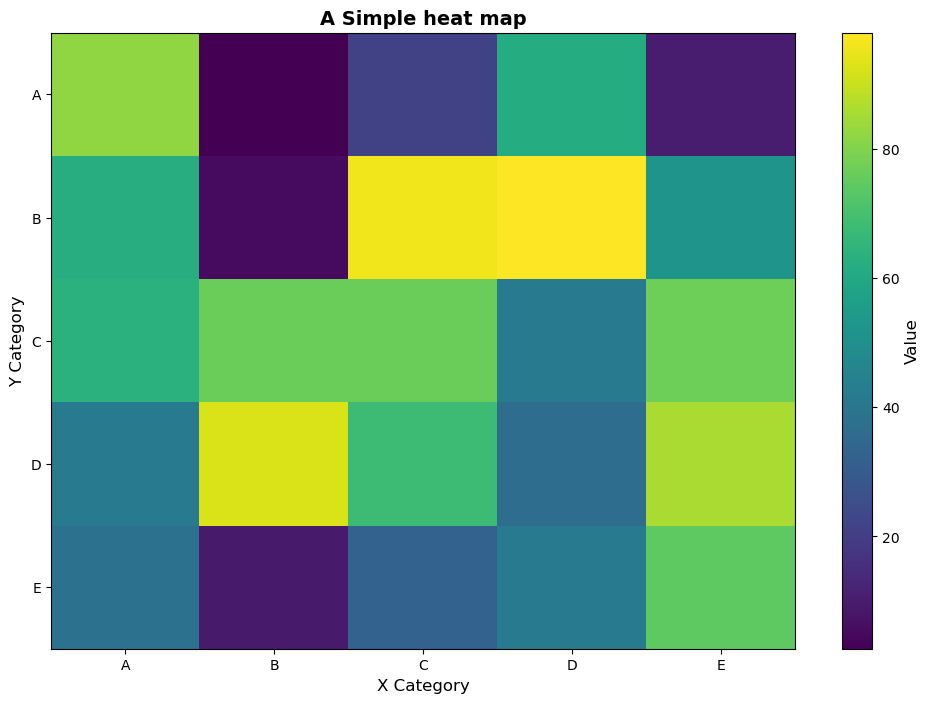

In [241]:
#A simple example...

# Create sample data (e.g., correlation matrix or confusion matrix)
np.random.seed(52)
data = np.random.rand(5, 5) * 100  # 5x5 matrix with values 0-100

labels = ['A', 'B', 'C', 'D', 'E']

# Create figure with two subplots
fig, ax1 = plt.subplots()
#(1,figsize=(14, 5))

im1 = ax1.imshow(data, cmap='viridis', aspect='auto')
ax1.set_xticks(np.arange(len(labels)))
ax1.set_yticks(np.arange(len(labels)))
ax1.set_xticklabels(labels)
ax1.set_yticklabels(labels)
ax1.set_title('A Simple heat map', fontsize=14, fontweight='bold')
ax1.set_xlabel('X Category', fontsize=12)
ax1.set_ylabel('Y Category', fontsize=12)

# Add colorbar
cbar1 = plt.colorbar(im1, ax=ax1)
cbar1.set_label('Value', fontsize=12)



Like the example we used before with digits, heat maps are often annotated with numbers ...

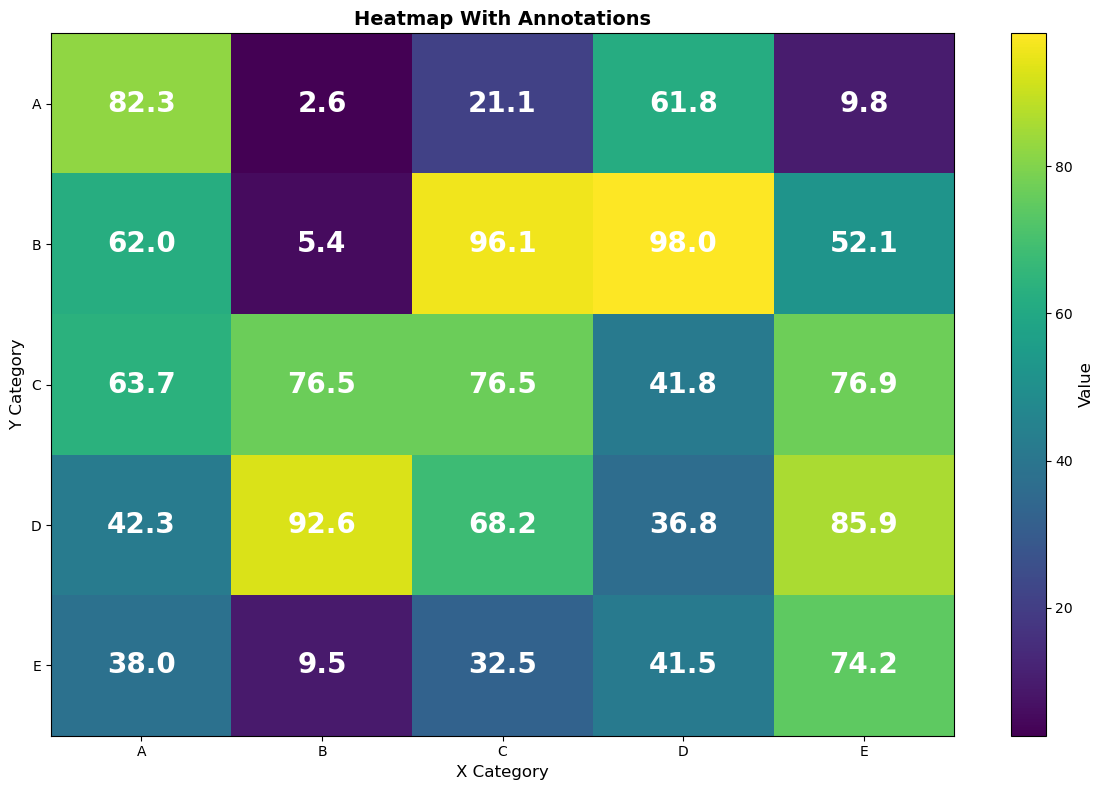

In [242]:
# with annotations

fig,ax2=plt.subplots()
im2 = ax2.imshow(data, cmap='viridis', aspect='auto')
ax2.set_xticks(np.arange(len(labels)))
ax2.set_yticks(np.arange(len(labels)))
ax2.set_xticklabels(labels)
ax2.set_yticklabels(labels)
ax2.set_title('Heatmap With Annotations', fontsize=14, fontweight='bold')
ax2.set_xlabel('X Category', fontsize=12)
ax2.set_ylabel('Y Category', fontsize=12)

# Add text annotations to each cell
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax2.text(j, i, f'{data[i, j]:.1f}',
                       ha="center", va="center", color="white", fontweight='bold',fontsize=20)

# Add colorbar
cbar2 = plt.colorbar(im2, ax=ax2)
cbar2.set_label('Value', fontsize=12)

plt.tight_layout()
plt.show()

#### _Heatmaps with Seaborn_

The matplotlib implementation of heatmaps is perfectly fine for most applications even if the coding syntax is just slightly wonky.   If you are impatient, Seaborn (separate plotting package) makes this easier ...

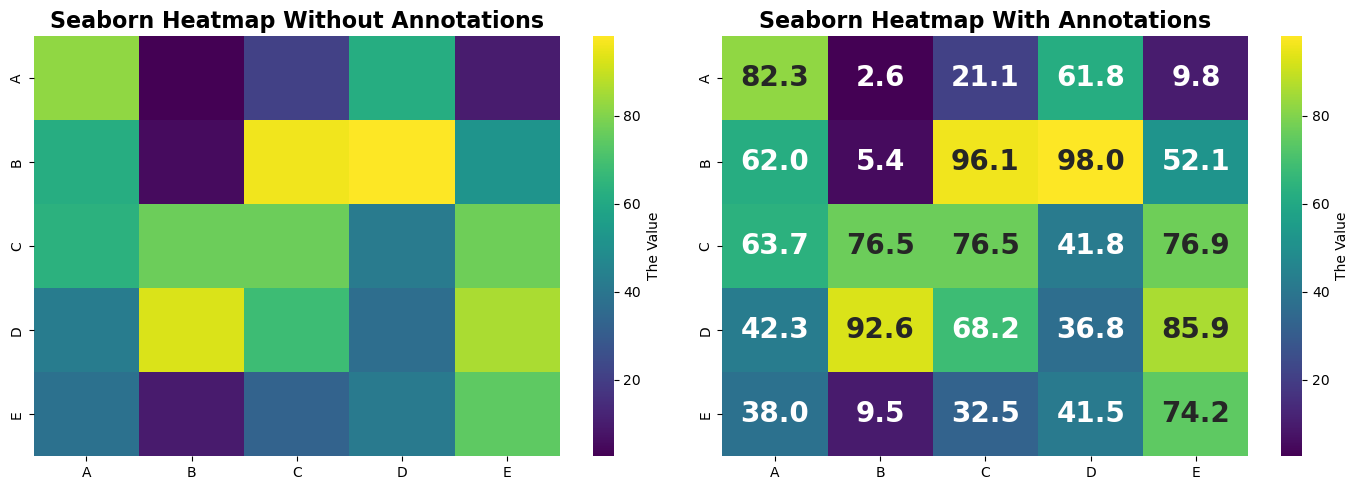

In [243]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

labels = ['A', 'B', 'C', 'D', 'E'] 

# Without annotations
sns.heatmap(data, xticklabels=labels, yticklabels=labels, 
            cmap='viridis', ax=ax1, cbar_kws={'label': 'The Value'})
ax1.set_title('Seaborn Heatmap Without Annotations', fontsize=16, fontweight='bold')

# With annotations
sns.heatmap(data, xticklabels=labels, yticklabels=labels, 
            cmap='viridis', annot=True, fmt='.1f', ax=ax2,
            cbar_kws={'label': 'The Value'},annot_kws={'fontweight': 'bold','fontsize':20})
ax2.set_title('Seaborn Heatmap With Annotations', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

### An Example: Spectral Covariance

We can illustrate a highly simplified version of visualizing a data set using each of these three types of plots.   Below is an image representation of a spectral covariance plot.  If noise were entirely uncorrelated between different wavelength channels (i.e. if the measurements in each channel were completely independent of one another) then only the diagonal would have a non-zero value (and it would all be 1).  



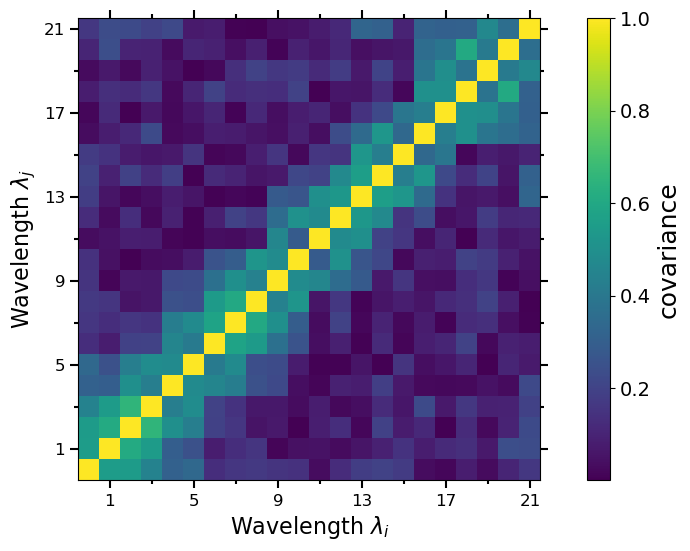

In [244]:
from astropy.io import ascii,fits #covered in next section on astropy: don't worry about it for now
from matplotlib.ticker import AutoMinorLocator,FormatStrFormatter

#see next section
a=fits.open('./files/spec_covar3.3500103lam_D.fits')[0].data

fig,axes=plt.subplots(figsize=(12,6))

result=axes.imshow(a,origin='lower')

#there are 22 channels: let's label every other one
major_ticks=[1,5,9,13,17,21]
#all the channels
labels=np.linspace(0,21,22,endpoint=True)
axes.set_xticks(major_ticks)
axes.set_yticks(major_ticks)
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(which='both',width='1.5',labelsize='large')
axes.tick_params(which='major',length=6)
axes.tick_params(which='minor',length=3)
axes.yaxis.set_major_formatter(FormatStrFormatter('%d'))
axes.xaxis.set_major_formatter(FormatStrFormatter('%d'))
axes.xaxis.set_ticks_position('both')
axes.yaxis.set_ticks_position('both')
axes.set_aspect('equal')
axes.set_xlabel(r'Wavelength $\lambda_{i}$',fontsize=16)
axes.set_ylabel(r'Wavelength $\lambda_{j}$',fontsize=16)

cbar=plt.colorbar(result)
cbar.set_label(label='covariance',fontsize=18)
cbar.ax.tick_params(labelsize=14)
plt.show()


Now, this is very close to a heatmap.  In fact, it basically functions as one ... except now let's add annotations

[1, 5, 9, 13, 17, 21]


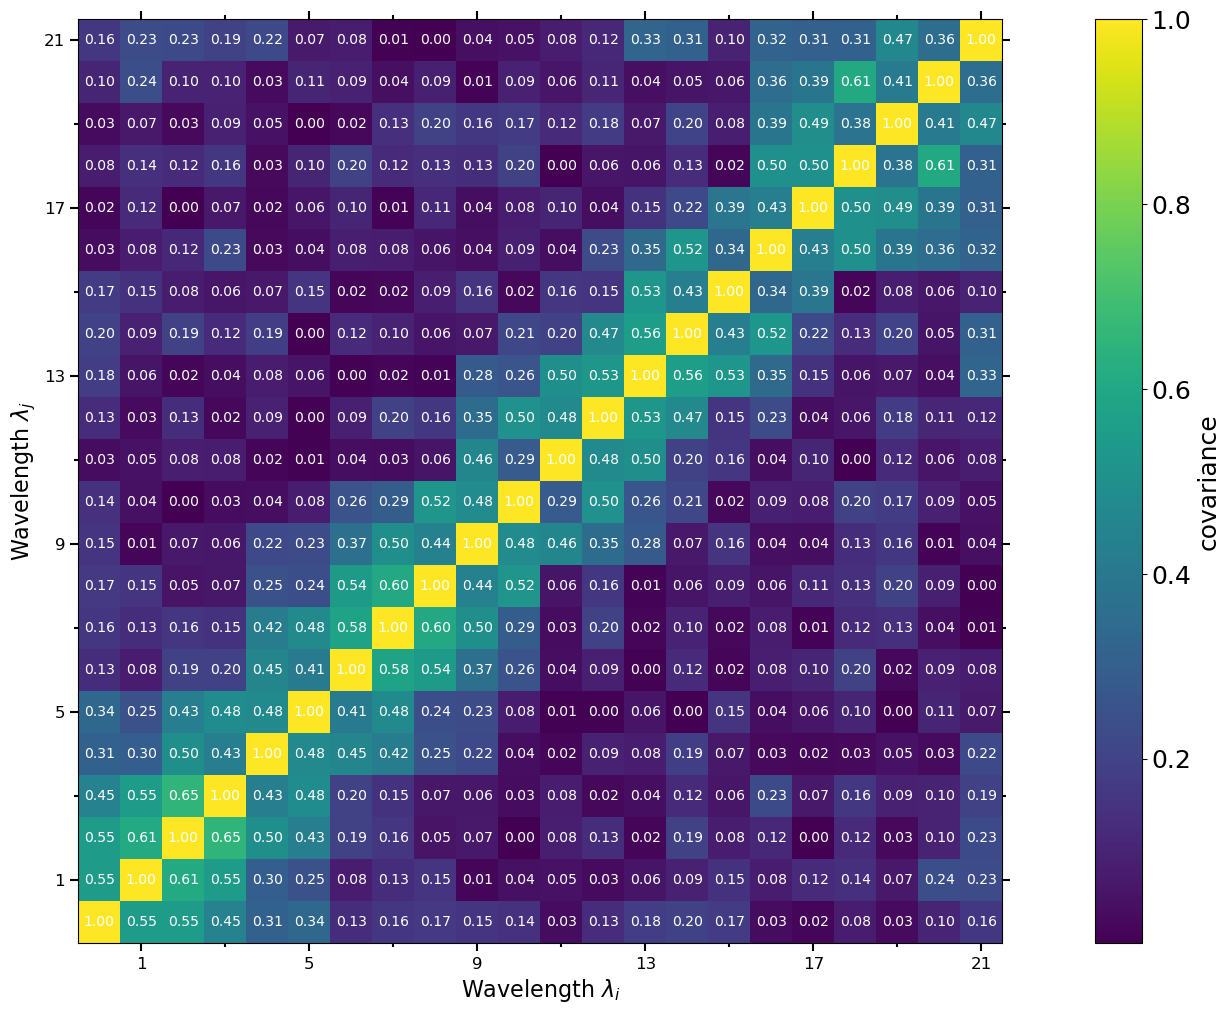

In [245]:
#turn this into a "very busy" heatmap with annotations

fig,axes=plt.subplots(figsize=(24,12))
result=axes.imshow(a,origin='lower')


major_ticks=[1,5,9,13,17,21]
print(major_ticks)
axes.set_xticks(major_ticks)
axes.set_yticks(major_ticks)
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(which='both',width='1.5',labelsize='large')
axes.tick_params(which='major',length=6)
axes.tick_params(which='minor',length=3)
axes.yaxis.set_major_formatter(FormatStrFormatter('%d'))
axes.xaxis.set_major_formatter(FormatStrFormatter('%d'))
axes.xaxis.set_ticks_position('both')
axes.yaxis.set_ticks_position('both')
axes.set_aspect('equal')
axes.set_xlabel(r'Wavelength $\lambda_{i}$',fontsize=16)
axes.set_ylabel(r'Wavelength $\lambda_{j}$',fontsize=16)
cbar=plt.colorbar(result)
cbar.set_label(label='covariance',fontsize=18)
cbar.ax.tick_params(labelsize=18)

for i in range(len(labels)):
    for j in range(len(labels)):
        text = axes.text(j, i, f'{a[i, j]:.2f}',
                       ha="center", va="center", color="white", fontsize=10)
plt.show()

Now, there are some trends in the covariance of these data.  To see them more clearly, let's chop up the data into 3 parts: 
* J band (about 1.1-1.4 microns/the first 6 channels)
* H band (about 1.4 to 1.85 microns (channels 7 to 15)
*  K band (channels 16-22/about 1.85 to 2.4 microns)

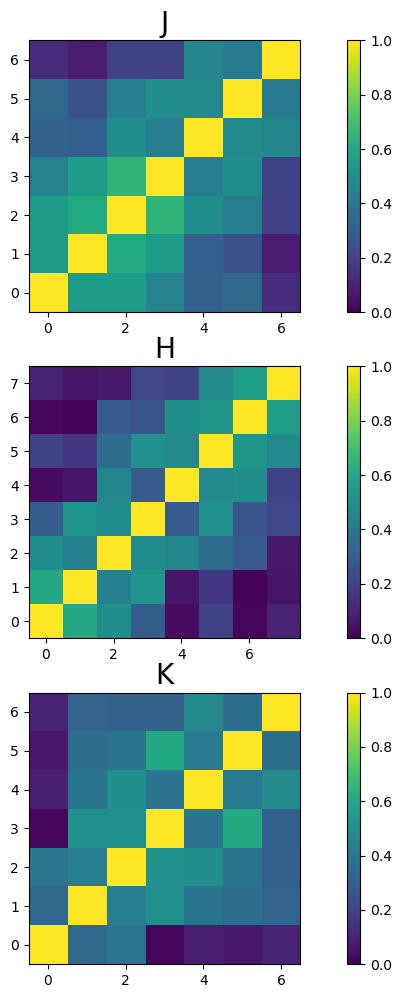

In [246]:
jrange=a[:7,:7]
hrange=a[7:15,7:15]
krange=a[15:,15:]

fig,axes=plt.subplots(3,1,figsize=(12,12))

channels=[jrange,hrange,krange]
bandpasses=['J','H','K']
for i,(j,k) in enumerate(zip(axes.flat,channels)):
    im=j.imshow(k,origin='lower',clim=(0.0,1))
    j.set_title(bandpasses[i],fontsize=20)
    fig.colorbar(im,ax=j,cmap='viridis')


"By eye", it looks like the covariance is strongest for J and K band?  Let's check ...

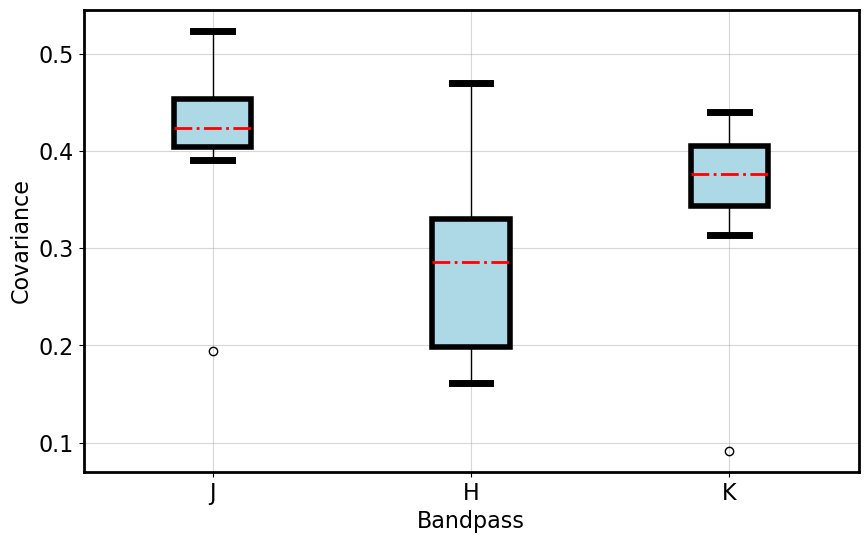

In [247]:
#compute the average in-band covariance for each channel

#avoid the covariance of a channel with itself: we are only interested in off-diagonal elements

masked_j,masked_h,masked_k=np.ma.masked_where(jrange == 1, jrange),np.ma.masked_where(hrange == 1, hrange),\
      np.ma.masked_where(krange == 1, krange)

#calculates the mean in-band covariance for each channel in J, H, and K
median_covar_j,median_covar_h,median_covar_k=np.ma.median(masked_j,axis=1),np.ma.median(masked_h,axis=1),np.ma.median(masked_k,axis=1)

#Now ... do box and whisker plot of the results

# Create the box plot
fig, ax = plt.subplots(figsize=(10, 6))

labels = ['J','H','K']
data = [median_covar_j,median_covar_h,median_covar_k]

bp = ax.boxplot(data,labels=labels, patch_artist=True,positions=[1,2,3])

# Customize the appearance with `patch_parts
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_edgecolor('black')
    patch.set_linewidth(4)

for cap in bp['caps']:
    cap.set(color='k', linewidth=5)

for median in bp['medians']:
    median.set(color='red', linewidth=2,linestyle='-.')

ax.tick_params(axis='both',labelsize=16)
ax.set_ylabel('Covariance',fontsize=16)
ax.set_xlabel('Bandpass',fontsize=16)
ax.grid(True, alpha=0.5)

plt.setp(ax.spines.values(),linewidth=2)
plt.show()

/Users/thaynecurrie/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/thaynecurrie/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


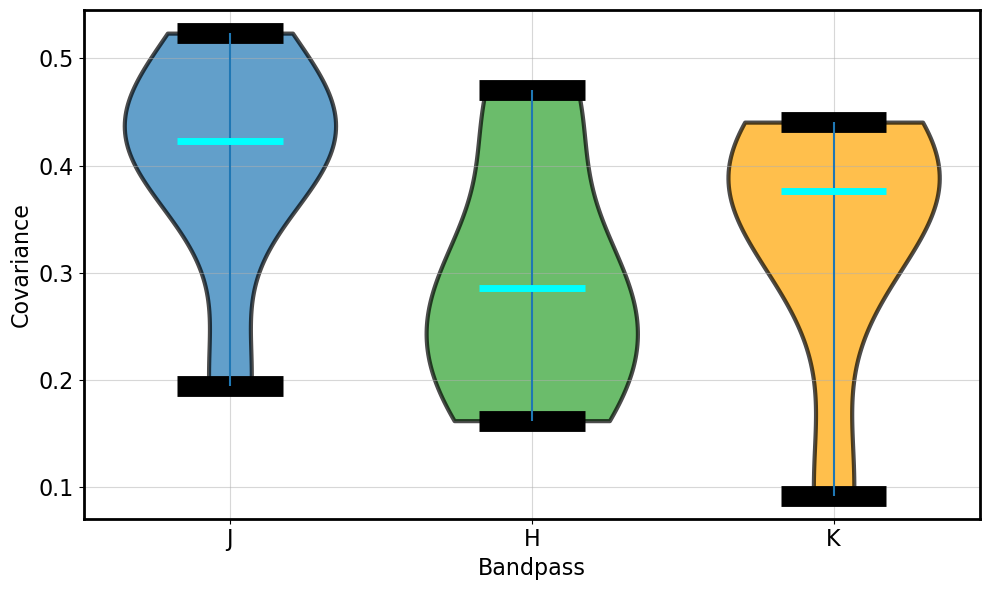

In [248]:
labels = ['J','H','K']
data = [median_covar_j,median_covar_h,median_covar_k]

# Create the violin plot
fig, ax = plt.subplots(figsize=(10, 6))

parts = ax.violinplot(data, 
                       positions=[1, 2, 3],
                       showmeans=False,
                       showmedians=True,
                       widths=0.7)

 #Customize colors
colors = ['tab:blue', 'tab:green', 'orange']
edge_colors=['black']*len(parts['bodies'])
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolors(edge_colors[i])
    pc.set_alpha(0.7)
    pc.set_linewidth(3)

for median in parts['cmedians'].get_segments():
    parts['cmedians'].set_color('cyan')
    parts['cmedians'].set_linewidth(5)
    parts['cmedians'].set_linestyle('--')

for median,iqr_low,iqr_high in zip(parts['cmedians'].get_segments(),parts['cmins'].get_segments(),parts['cmaxes'].get_segments()):
    parts['cmedians'].set_color('cyan')
    parts['cmedians'].set_linewidth(5)
    parts['cmedians'].set_linestyle('-')
    parts['cmins'].set_color('k')
    parts['cmins'].set_linewidth(15)
    parts['cmins'].set_linestyle('-')
    parts['cmaxes'].set_color('k')
    parts['cmaxes'].set_linewidth(15)
    parts['cmaxes'].set_linestyle('-')
    
# Labels and formatting
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(labels)

ax.tick_params(axis='both',labelsize=16)
ax.grid(axis='y', alpha=0.3)
ax.set_ylabel('Covariance',fontsize=16)
ax.set_xlabel('Bandpass',fontsize=16)
ax.grid(True, alpha=0.5)

plt.setp(ax.spines.values(),linewidth=2)

plt.tight_layout()
plt.show()